# Plotting with Matplotlib

## Import pyplot

With Jupyter notebooks, it becomes very easy to plot charts and graphs in various styles, in just a couple of line of code. To make things work, we do a standard import which we will refer to as `plt` throughout, by convention. There are other ways of doing this, by invoking jupyter magic commands etc., but we'll stick to a slightly more verbose way to keep things explicit, and to make them portable across notebooks and Python IDEs.

```
import matplotlib.pyplot as plt
```

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# -----------------------------------------------------------------
# Sometimes we may want to customize some aspect of *all* figures that we produce.
# Rather than do that one a figure-by-figure basis, we can set the 'rcParams' of
# the matplotlib library instead.

# Print path to rc file
#   print(matplotlib.matplotlib_fname())
# Set default line width
# matplotlib.rcParams['lines.linewidth'] = 5
# ...
# -----------------------------------------------------------------

## Matplotlib Terminology

Matplotlib uses the following terminology. Online materials don't adhere to this terminology strictly, but if *we* make sure we do, it will save us a lot of confusion later on.

Consider the figure below:

![Matplotlib1](images/matplotlib1.png)

## Figure/Subplot/Axes

The following diagrams show components of basic Matplotlib terminology.

![Matplotlib2](images/matplotlib2.png)
![Matplotlib3](images/matplotlib3.png)
![Matplotlib4](images/matplotlib4.png)

## Line Plot

In [ ]:
# Generate evenly-spaced 100 points between 0 and 10
x = np.linspace(0, 10, 100)

# Create a figure
fig = plt.figure()

# Our figure just has one subplot. By adding the subplot using add_subplot
# we get an 'Axes' (X-axis + Y-axis) object back
# The '111' here is telling the figure to add 1 row x 1 column of subplots (i.e. a single subplot),
# and to get back the 1st subplot thus added.
ax = fig.add_subplot(111)

# Now that we have the Axes object, we can call 'plot' on it,
# with the x/y values (lists of numbers) that we want to plot.
# We can also call 'scatter', 'bar' etc. for different kind of plots.
ax.plot(x, x, label='linear')

# Create a legend on the Axes
# You might also see plt.legend() but that has a potential to get confusing later on.
ax.legend()

# Ask the pyplot module to show any figure(s) we have created
plt.show()

## Line Plots, Scatter Plots, Bar Plots, oh my!

Let's try to incrementally create a (much more) elaborate figure that looks something like this:

![Subplots](images/matplotlib5.png)

In [ ]:
# We can specify the figure size (width, height) in inches
fig = plt.figure(figsize=(20,10))

# One row of two subplots - get the Axes on the first one
ax = fig.add_subplot(121)

# ------------ Line + Scatter Plot ------------#
# Let's customize the 'Line' we create on this Axes
# All of these (except the x and y values) are optional
ax.plot(
    [1, 2, 3, 4],       # x values
    [10, 20, 25, 30],   # y values
    color='blue',       # This can be something like 'b'/'blue'/'#ffff00'/0.4 (greyscale)/(0.5, 0, 0) (RGB values)
    linestyle='--',     # '-' by default
    linewidth=3,        # 1 by default
    marker='o',         # By default, no markers are used, just a smooth line
    label='Blue Line'
)

# Create another 'Line'
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^', label='Green Readings')

# We can customize aspect of the Axes object (title, limits, labels, ticks)
ax.set_xlim(0.5, 4.5)
ax.set_title('First Subplot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

# ------------ Line + Scatter Plot ------------#


# One row of two subplots - get the Axes on the second one
ax = fig.add_subplot(122)
ax.bar([1,2,3,4], [10,10,24,56])
ax.set_title('Second Subplot')
ax.set_xlabel('X')
ax.set_ylabel('Frequency')

# To save the current figure to a file, do a plt.savefig before you do a show()
plt.savefig("foo.png")  # or foo.pdf
plt.legend()
plt.show()

## Styling Plots

The attached image seems to use some of it's own styles (grey background with gridlines). In many cases we can style our entire set of figures
by using any of the available styles.

In [ ]:
# List available styles
print(plt.style.available)

# Use a particular built-in style
plt.style.use("ggplot")
# Or point to our own style file - an example is provided in this folder
# plt.style.use("files/mystyle.mplstyle")

# Examples

## Example 1

Let's try to use most of what we've learnt so far for lists/for loops/plotting to analyze a work of literature, and plot mentions of character(s) in the book as the book progresses.

[Project Gutenberg](http://www.gutenberg.org) has the text for a lot of works of copyright-free literature. We choose [The Three Musketeers](http://www.gutenberg.org/ebooks/1257) here and look for mentions of the (Four!) Musketeers, but once you get the exercise working, you can use your program for any of the classics with any characters you want to search for.

If our program works correctly, we should get a graph that looks like the following, indicating that D'Artagnan far surpasses the three musketeers in popularity!

![character_graph](images/the_three_musketeers.png)

In [ ]:
# ---------------------------------------------------------------------------- #
# -- Don't worry about this part of the code for now - assume it just works -- #
# ---------------------------------------------------------------------------- #
import requests

def get_lines(url):
        return requests.get(url).content.decode('utf-8').split('\n')
# ---------------------------------------------------------------------------- #

# ----------------------- CONSTANTS ---------------------------#
BOOK_TITLE = 'The Three Musketeers'

# Browse for your favorite book and
# copy-paste the link to the Plain Text UTF-8 file below.
BOOK_LINK = 'http://www.gutenberg.org/files/1257/1257-0.txt'

# Terms or 'tokens' that we wish to search
TOKENS = ['athos', 'porthos', 'aramis', 'd’artagnan']
# ----------------------- CONSTANTS ---------------------------#

# ------------------------------------------------------------------------ #
# get_lines gives us the lines of the book (given a link to it), in a List #
# ------------------------------------------------------------------------ #
lines = get_lines(BOOK_LINK)

# -------------------------------------------------------- #
# COMPLETE THIS CODE
# ???
# -------------------------------------------------------- #

## Example 2: A scatter plot of demographic data

To explore the correlation between birth rate, life expectancy and per capita income, we may use a scatter plot. Note that the marker sizes are set in proportion to the countries' per-capita GDP but have to be scaled a little so they don't get too large.

![Demographic Scatter Plot](images/demographic-scatter-plot.png)

In [ ]:
countries = ['Brazil', 'Madagascar', 'S. Korea', 'United States', 'Ethiopia', 'Pakistan', 'China', 'Belize']
# Birth rate per 1000 population
birth_rate = [16.4, 33.5, 9.5, 14.2, 38.6, 30.2, 13.5, 23.0]
# Life expectancy at birth, years
life_expectancy = [73.7, 64.3, 81.3, 78.8, 63.0, 66.4, 75.2, 73.7]
# Per person income fixed to US Dollars in 2000
GDP = np.array([4800, 240, 16700, 37700, 230, 670, 2640, 3490])

# ---- Write your code here ------ #

# ---- Write your code here ------ #

## Example 2: Median age at first marriage in the US over time

The data read in from the file [eg7-marriage-ages.txt](datasets/eg7-marriage-ages.txt), giving the median age at first marriage in the United States for 13 decades since 1890 are plotted by the program below. Grid lines are turned on for both axes with `ax.grid()` and custom markers are used for the data points themselves.

![Marriage Age](images/marriage-age.png)

Hint: We can specify our own markers using the Latex syntax. For example, `'$\u2642$'` creates a marker specified by the Unicode Character at codepoint `2642` (the Mars Symbol). See [Gender symbol](https://en.wikipedia.org/wiki/Gender_symbol)

In [ ]:
year, age_m, age_f = np.loadtxt('datasets/eg7-marriage-ages.txt', unpack=True, skiprows=3)

# ---- Write your code here ------ #

# ---- Write your code here ------ #

## 3D Plots

3D plots are used somewhat less frequently with Matplotlib. However, it does have the capability of displaying 3D scatter/contour plots, along with pan/zoom capability, as this example shows.

The following code reads data from the csv file [datasets/CaliforniaHousing/cal_housing.data](datasets/CaliforniaHousing/cal_housing.data) as a Numpy ndarray. The data represents Housing Price data in California against a number of features like the No. of Rooms/Median Income etc.

The code  plots the Median House Value vs. the Total No. of Rooms and the Median Housing Age, as a 3D ScatterPlot in Matplotlib. We consider only the first 300 rows of data here to avoid performance issues with rendering.

(20640, 9)


<IPython.core.display.Javascript object>


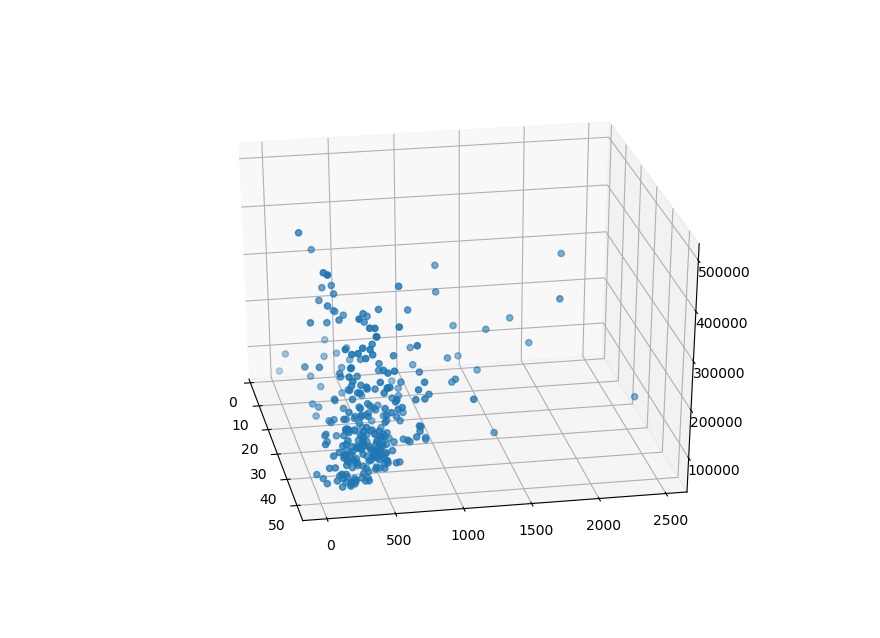

In [3]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

# ----------- Read data in a numpy array -----------#
data = []
f = open('datasets/CaliforniaHousing/cal_housing.data')
for line in f.readlines():
    values = map(float, line.split(','))
    data.extend(values)
f.close()
data = np.array(data).reshape((-1, 9))
print(data.shape)
# ----------- Read data in a numpy array -----------#

# ----------- 3D Scatter plot -----------#
x = data[:300, 2]  # totalRooms
y = data[:300, 4]  # totalBedrooms
z = data[:300, 8]  # medianHouseValue

ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z)
# ----------- 3D Scatter plot -----------#